<a id=section1></a>
## 1. Problem Statement

It is very difficult to assess the quality of **wine** just by reading the label. Quality is assessed best by tasting. but as we have dataset which contains different ingredient of **wine** and also we have **Quality of Wine** column. So based on that we will try to find out what should be level of various ingredients to get the **best quality of wine**.

<img src = 'https://static01.nyt.com/images/2019/02/13/dining/13pour1/merlin_150020475_775d925d-78a9-4798-b9e7-fd9e497708a8-superJumbo.jpg'>

---

<a id=section2></a>
## 2. Importing Packages

In [1]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.font_manager import FontProperties

fontP = FontProperties()

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [3]:
!pip install plotly --upgrade

Requirement already up-to-date: plotly in c:\anaconda\lib\site-packages (4.9.0)


In [4]:
# Install chart_studio, please use this command. 

!pip install chart-studio --upgrade

Requirement already up-to-date: chart-studio in c:\anaconda\lib\site-packages (1.1.0)


In [5]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

---

<a id=section3></a>
## 3. Loading Data


In this **Data Visualization** sheet we are using 1 dataset which contains different ingredient of **wine** and also we have **Quality of Wine column**. 

<img src="https://previews.123rf.com/images/aninata/aninata1711/aninata171100109/90866256-hello-winter-mulled-wine-vector-illustration.jpg" width=750 height=750><br/>

---

## Importing Dataset

In [6]:
# Importing wine dataset
df_wineData = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/winequality.csv')
df_wineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<a id=section301></a>
### Description of the Dataset
- This dataset provides information about **wine's** ingredient like citric acid, chlorides, sulfur dioxide, density, PH, alcohol etc.
<table style="border: 1px solid #900; width:900">
    <tr style="border: 1px solid #900">
    <th style="border: 1px solid #900; text-align:center"> Column Name </th>
    <th style="text-align:center"> Description </th>
    </tr>    
    <tr>
    <td style="border: 1px solid #900;text-align:left"> fixed acidity </td>
    <td style="border: 1px solid #900;text-align:left"> most acids involved with wine or fixed or nonvolatile (do not evaporate readily). </td>
    </tr>    
     <tr>
    <td style="border: 1px solid #900;text-align:left"> volatile acidity  </td>
    <td style="border: 1px solid #900;text-align:left"> the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste. </td>
    </tr>    
     <tr>
    <td style="border: 1px solid #900;text-align:left"> citric acid </td>
    <td style="border: 1px solid #900;text-align:left"> found in small quantities, citric acid can add ‘freshness’ and flavor to wines. </td>
    </tr>    
     <tr>
    <td style="border: 1px solid #900;text-align:left"> residual sugar </td>
    <td style="border: 1px solid #900;text-align:left"> the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.. </td>
    </tr>
     <tr>
    <td style="border: 1px solid #900;text-align:left"> chlorides </td>
    <td style="border: 1px solid #900;text-align:left"> the amount of salt in the wine. </td>
    </tr>
     <tr>
    <td style="border: 1px solid #900;text-align:left"> free sulfur dioxide </td>
    <td style="border: 1px solid #900;text-align:left"> free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine. </td>
    </tr>
     <tr>
    <td style="border: 1px solid #900;text-align:left"> total sulfur dioxide </td>
    <td style="border: 1px solid #900;text-align:left"> amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine. </td>
    </tr>
     <tr>
    <td style="border: 1px solid #900;text-align:left"> density </td>
    <td style="border: 1px solid #900;text-align:left"> the density of water is close to that of water depending on the percent alcohol and sugar content. </td>
    </tr>
     <tr>
    <td style="border: 1px solid #900;text-align:left"> pH </td>
    <td style="border: 1px solid #900;text-align:left"> describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale. </td>
    </tr>
     <tr>
    <td style="border: 1px solid #900;text-align:left"> sulphates </td>
    <td style="border: 1px solid #900;text-align:left"> a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial andantioxidant. </td>
    </tr>
     <tr>
    <td style="border: 1px solid #900;text-align:left"> alcohol </td>
    <td style="border: 1px solid #900;text-align:left"> the percent alcohol content of the wine. </td>
    </tr>
     <tr>
    <td style="border: 1px solid #900;text-align:left"> quality </td>
    <td style="border: 1px solid #900;text-align:left"> score between 0 to 10. </td>
    </tr>
</table>

In [7]:
df_wineData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


---

- **Info** gives following information
    - There are total **6497** rows & **12** columns in given data
    - There are 11 columns with **float** datatype and 1 column with **int** datatype

In [8]:
df_wineData.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


- ```describe``` function gives us the following insights into the data:

- ***fixed acidity, volatile acidity, residual sugar & chlorides*** data is positively (Right) skewed as it's ***mean*** value lies to the right of ***median(50%)*** value
- ***citric acid, free sulfur dioxide, total sulfar dioxide, density, pH & alcohol*** data seems to be ***normally distributed*** because ***mean*** value is close to the ***median(50%)*** value
- By comparing ***75%*** value & ***max*** value, we can see that except ***density, pH & alcohol***, all other columns have ***outliers*** 

<a id=section302></a>
### 3.2 Pandas Profiling before Data Preprocessing

- Here, we will perform **Pandas Profiling before preprocessing** our dataset, so we will name the **output file** as __Wine_Data_profiling_before_pre-processing.html__. 
- The ***output file*** is stored in Project Path

In [9]:
!pip install pandas_profiling --upgrade --user

Requirement already up-to-date: pandas_profiling in c:\users\priyanka dhiraj\appdata\roaming\python\python37\site-packages (2.8.0)


In [10]:
import pandas_profiling as pp

In [11]:
profile = df_wineData.profile_report(title='Wine Data Profiling before processing')
profile.to_file(output_file="Wine_Data_profiling_before_pre-processing.html")

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 12
- Number of observations: 6497
- Missing cells: 0 (0.0%)
- Duplicate rows: 1179 (18.1%)

__Variables types__: 
- Numeric = 12

<br>

- ***citric acid*** has ***151 (2.3%)*** Zeros.
- ***fixed acidity*** has skewness of ***1.723289647*** and ***Kurtosis*** of ***5.061160665***
    - It is ***positively(Right)*** skewed.
    - ***95%*** data in ***fixed acidity*** is less than ***9.8***.

In [12]:
duplicatedRows = df_wineData[df_wineData.duplicated(keep='first')]

In [13]:
duplicatedRows.count()

fixed acidity           1179
volatile acidity        1179
citric acid             1179
residual sugar          1179
chlorides               1179
free sulfur dioxide     1179
total sulfur dioxide    1179
density                 1179
pH                      1179
sulphates               1179
alcohol                 1179
quality                 1179
dtype: int64

In [14]:
df_wineData.drop_duplicates(keep='first',inplace=True)

In [15]:
df_wineData = df_wineData.reset_index(drop=True)

In [16]:
df_wineData.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000
mean,7.215523,0.344171,0.318522,5.049605,0.056700,30.030463,114.107747,0.994536,3.224639,0.533402,10.549222,5.795600
std,1.319777,0.168264,0.147177,4.500645,0.036865,17.804365,56.783848,0.002966,0.160403,0.149753,1.185964,0.879715
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994660,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.750000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


-------------------------------------

__**As both total sulfur dioxide & free sulfur dioxide have very few values in float datatype, converting it to Integer**__


In [17]:
df_wineData['total sulfur dioxide'] = df_wineData['total sulfur dioxide'].apply(np.floor).astype('int64')
df_wineData['free sulfur dioxide'] = df_wineData['free sulfur dioxide'].apply(np.floor).astype('int64')

In [18]:
df_wineData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5318 entries, 0 to 5317
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5318 non-null   float64
 1   volatile acidity      5318 non-null   float64
 2   citric acid           5318 non-null   float64
 3   residual sugar        5318 non-null   float64
 4   chlorides             5318 non-null   float64
 5   free sulfur dioxide   5318 non-null   int64  
 6   total sulfur dioxide  5318 non-null   int64  
 7   density               5318 non-null   float64
 8   pH                    5318 non-null   float64
 9   sulphates             5318 non-null   float64
 10  alcohol               5318 non-null   float64
 11  quality               5318 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 498.7 KB


__**Reducing decimal points for Volatile Acidity, Chlorides, Alcohol & Density**__

In [19]:
df_wineData = df_wineData.round({'volatile acidity':2,'chlorides':2,'alcohol':2,'density':4})

__**Calculating Z-Score for values in all columns**__

In [20]:
df_wineData['fixed_ac_Z'] = np.abs((df_wineData['fixed acidity'] - df_wineData['fixed acidity'].mean())/df_wineData['fixed acidity'].std())
df_wineData['volatile_ac_Z'] = np.abs((df_wineData['volatile acidity'] - df_wineData['volatile acidity'].mean())/df_wineData['volatile acidity'].std())
df_wineData['citric_ac_Z'] = np.abs((df_wineData['citric acid'] - df_wineData['citric acid'].mean())/df_wineData['citric acid'].std())
df_wineData['res_sug_Z'] = np.abs((df_wineData['residual sugar'] - df_wineData['residual sugar'].mean())/df_wineData['residual sugar'].std())
df_wineData['chlorides_Z'] = np.abs((df_wineData['chlorides'] - df_wineData['chlorides'].mean())/df_wineData['chlorides'].std())
df_wineData['freeSO2_Z'] = np.abs((df_wineData['free sulfur dioxide'] - df_wineData['free sulfur dioxide'].mean())/df_wineData['free sulfur dioxide'].std())
df_wineData['totalSO2_Z'] = np.abs((df_wineData['total sulfur dioxide'] - df_wineData['total sulfur dioxide'].mean())/df_wineData['total sulfur dioxide'].std())
df_wineData['density_Z'] = np.abs((df_wineData['density'] - df_wineData['density'].mean())/df_wineData['density'].std())
df_wineData['pH_Z'] = np.abs((df_wineData['pH'] - df_wineData['pH'].mean())/df_wineData['pH'].std())
df_wineData['sulphates_Z'] = np.abs((df_wineData['sulphates'] - df_wineData['sulphates'].mean())/df_wineData['sulphates'].std())
df_wineData['alcohol_Z'] = np.abs((df_wineData['alcohol'] - df_wineData['alcohol'].mean())/df_wineData['alcohol'].std())
df_wineData['quality_Z'] = np.abs((df_wineData['quality'] - df_wineData['quality'].mean())/df_wineData['quality'].std())

__**Creating a set of indexes for each column, where Z-Score is greater than or equal to 5**__

In [21]:
fixed_ac_ind = set(df_wineData[df_wineData['fixed_ac_Z'] >= 5]['fixed acidity'].index)
volatile_ac_ind = set(df_wineData[df_wineData['volatile_ac_Z'] >= 5]['volatile acidity'].index)
citric_ac_ind = set(df_wineData[df_wineData['citric_ac_Z'] >= 5]['citric acid'].index)
res_sug_ind = set(df_wineData[df_wineData['res_sug_Z'] >= 5]['residual sugar'].index)
chlo_ind = set(df_wineData[df_wineData['chlorides_Z'] >= 5]['chlorides'].index)
freeSO2_ind = set(df_wineData[df_wineData['freeSO2_Z'] >= 5]['free sulfur dioxide'].index)
totalSO2_ind = set(df_wineData[df_wineData['totalSO2_Z'] >= 5]['total sulfur dioxide'].index)
dens_ind = set(df_wineData[df_wineData['density_Z'] >= 5]['density'].index)
pH_ind = set(df_wineData[df_wineData['pH_Z'] >= 5]['pH'].index)
sulph_ind = set(df_wineData[df_wineData['sulphates_Z'] >= 5]['sulphates'].index)
alcohol_ind = set(df_wineData[df_wineData['alcohol_Z'] >= 5]['alcohol'].index)
quality_ind = set(df_wineData[df_wineData['quality_Z'] >= 5]['quality'].index)

__Dropping all Z-Score Columns__

In [22]:
df_wineData.drop(['fixed_ac_Z','volatile_ac_Z','citric_ac_Z','res_sug_Z','chlorides_Z','freeSO2_Z','totalSO2_Z','density_Z','pH_Z','sulphates_Z','alcohol_Z','quality_Z'],1,inplace=True)

__There are total 69 records with Z-Score greater than or equal to 5__

In [23]:
len(fixed_ac_ind)+len(volatile_ac_ind)+len(citric_ac_ind)+len(res_sug_ind)+len(chlo_ind)+len(freeSO2_ind)+len(totalSO2_ind)+len(dens_ind)+len(pH_ind)+len(sulph_ind)+len(alcohol_ind)+len(quality_ind)

69

__**Taking all the indexes in on evariable to delete the rows**__

In [24]:
indexAll = list(fixed_ac_ind | volatile_ac_ind | citric_ac_ind | res_sug_ind | chlo_ind | freeSO2_ind | totalSO2_ind | dens_ind | pH_ind | sulph_ind | alcohol_ind | quality_ind)

__**Delete the rows using indexes, the reset dataframe index**__

In [25]:
rowsToDelete = df_wineData.index[indexAll]
df_wineData.drop(rowsToDelete, inplace=True)
df_wineData = df_wineData.reset_index(drop=True)

------------------------------------------------------------------------------------------

**Basic Wine Characteristics** <br><br>
__1. Sweetness__:
- Bone Dry: < 1 g/L
- Dry: 1-10 g/L
- Off-Dry: 10-35 g/L
- Sweet: 35-120 g/L
- Very Sweet: 120-220 g/L

__2. Acidity__: 
- The three prevalent acids in wine are tartaric, citric and malic
- pH is the measure of acidity in wine on a logarithmic scale (Mostlt between 2.5 and 4.5)
- pH and acidity have a negative correlation

__3. Tannin__: 
- More the Tannins, Dryer the Wine

__4. Body__: 
- Light-Bodied: 8-10% Alcohol
- Medium-Bodied: 10-12% Alcohol
- Full-Bodied: 12-15% Alcohol

<br>

<img src="https://media.winefolly.com/basic-wine-characteristics-traits-winefolly.jpg" width=750 height=750><br/>

<br>

__We will create 2 extra columns named 'Sweetness' & 'Body' to distinguish the data based on Wine Characteristics__
<br>

In [36]:
print("Min:",df_wineData['residual sugar'].min())
print("Max:",df_wineData['residual sugar'].max())

Min: 0.6
Max: 26.05


__As we have max residual sugar 26.05, we will distinguish Sweetness till "Off-Dry: 10-35 g/L"__

In [37]:
df_wineData.loc[df_wineData['residual sugar']<1.0 , 'Sweetness'] = 'Bone Dry'
df_wineData.loc[(df_wineData['residual sugar'] >= 1.0) & (df_wineData['residual sugar'] < 10.0) , 'Sweetness'] = 'Dry'
df_wineData.loc[(df_wineData['residual sugar'] >= 10.0) & (df_wineData['residual sugar'] < 35.0) , 'Sweetness'] = 'Off-Dry'

In [38]:
print("Min:",df_wineData['alcohol'].min())
print("Max:",df_wineData['alcohol'].max())

Min: 8.0
Max: 14.2


__As we have Alcohol % between 8.0 to 14.2, we will divide it into following parts__
- Light-Bodied: 8-10% Alcohol
- Medium-Bodied: 10-12% Alcohol
- Full-Bodied: 12-15% Alcohol

In [39]:
df_wineData.loc[(df_wineData['alcohol'] >= 8.0) & (df_wineData['alcohol'] < 10.0), 'Body'] = 'Light'
df_wineData.loc[(df_wineData['alcohol'] >= 10.0) & (df_wineData['alcohol'] < 12.0) , 'Body'] = 'Medium'
df_wineData.loc[(df_wineData['alcohol'] >= 12.0) & (df_wineData['alcohol'] < 15.0) , 'Body'] = 'Full'

__Pandas Profiling after Data Processing__

In [40]:
profileAfter = df_wineData.profile_report(title='Wine Data Pandas Profiling after processing')
profileAfter.to_file(output_file="Wine_Data_profiling_after_preprocessing.html")

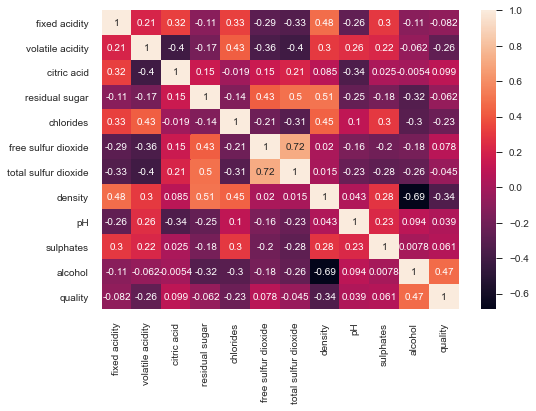

In [40]:
corr_matrix = df_wineData.corr()
sns.heatmap(corr_matrix, annot=True)

- **Density** and **Alcohol** are ***Negatively(Inversely)*** correlated **(-0.7)**
- **Residual Sugar** is ***Positively*** correlated to **Free & Total Sulfar Dioxide** & **Density**
- **Quality** and **Alcohol** are ***positively*** correlated **(0.48)**
- **Free Sulfar Dioxide** and **Total Sulfar Dioxide** are ***highely*** correlated **(0.72)**. It makes sense as free sulfar dioxide and some other forms of sulfar dioxide sum up to Total sulfar dioxide.
- **Citric Acid** is ***Negatively(-0.42)*** Correlated to **volatile acidity** but ***Positively(0.3)*** correlated(weak) to **fixed acidity**
- **Chlorides** are ***Positively (0.44 & 0.35)*** correlated to **volatile acidity** & **fixed acidity**

In [41]:
df_wineData['Body'].value_counts()

Medium    2450
Light     1963
Full       845
Name: Body, dtype: int64

Text(0.5, 1.0, 'Pie chart showing the proportion of Wine Body values in Dataset')

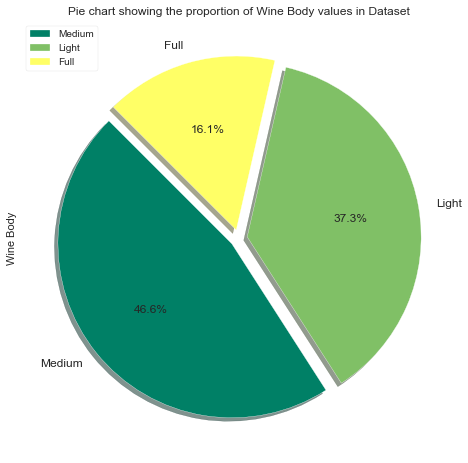

In [42]:
df_wineData['Body'].value_counts().plot(kind='pie', explode=[0.05,0.05,0.05], fontsize=12, autopct='%3.1f%%', 
                                               figsize=(12,8), shadow=True, startangle=135, legend=True, cmap='summer')

plt.ylabel('Wine Body')
plt.title('Pie chart showing the proportion of Wine Body values in Dataset')

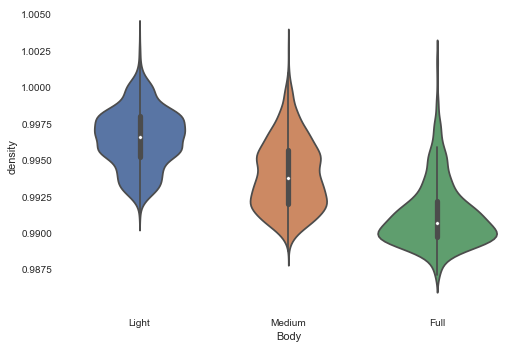

In [43]:
sns.violinplot(x='Body', y='density', data=df_wineData)

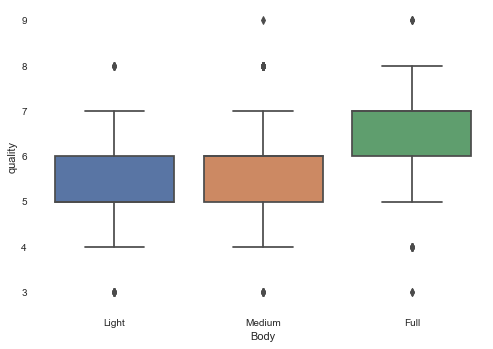

In [44]:
sns.boxplot(x='Body', y='quality', data=df_wineData)

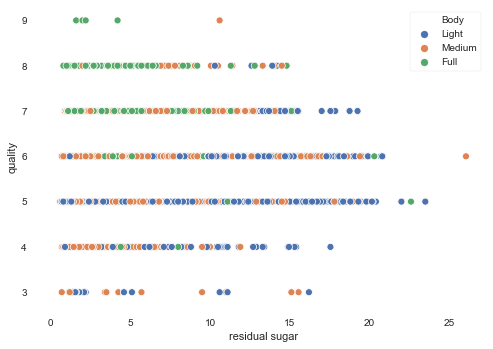

In [45]:
sns.scatterplot(x ='residual sugar', y= 'quality', hue='Body', data=df_wineData)

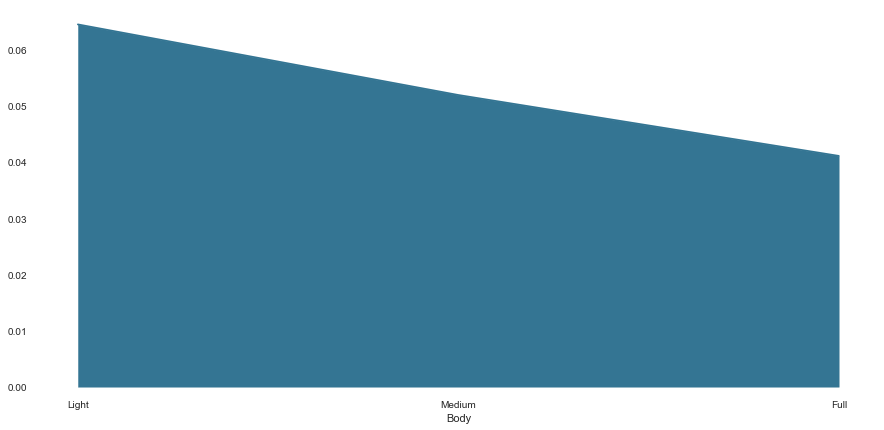

In [46]:
df_wineData.groupby(['Body'])['chlorides'].mean().sort_values(ascending=False).plot(kind='area', figsize=(15,7), color= '#347593')

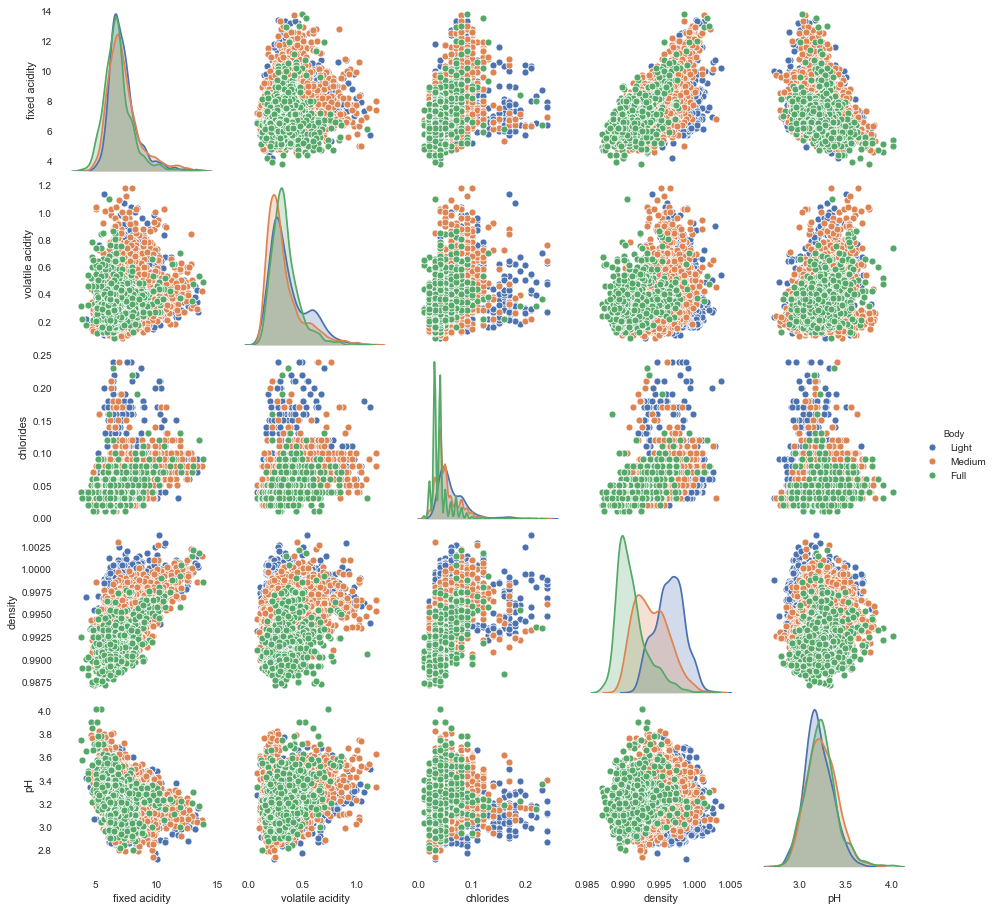

In [47]:
sns.pairplot(df_wineData, vars= ['fixed acidity','volatile acidity','chlorides','density','pH'], hue='Body', diag_kind='kde' )

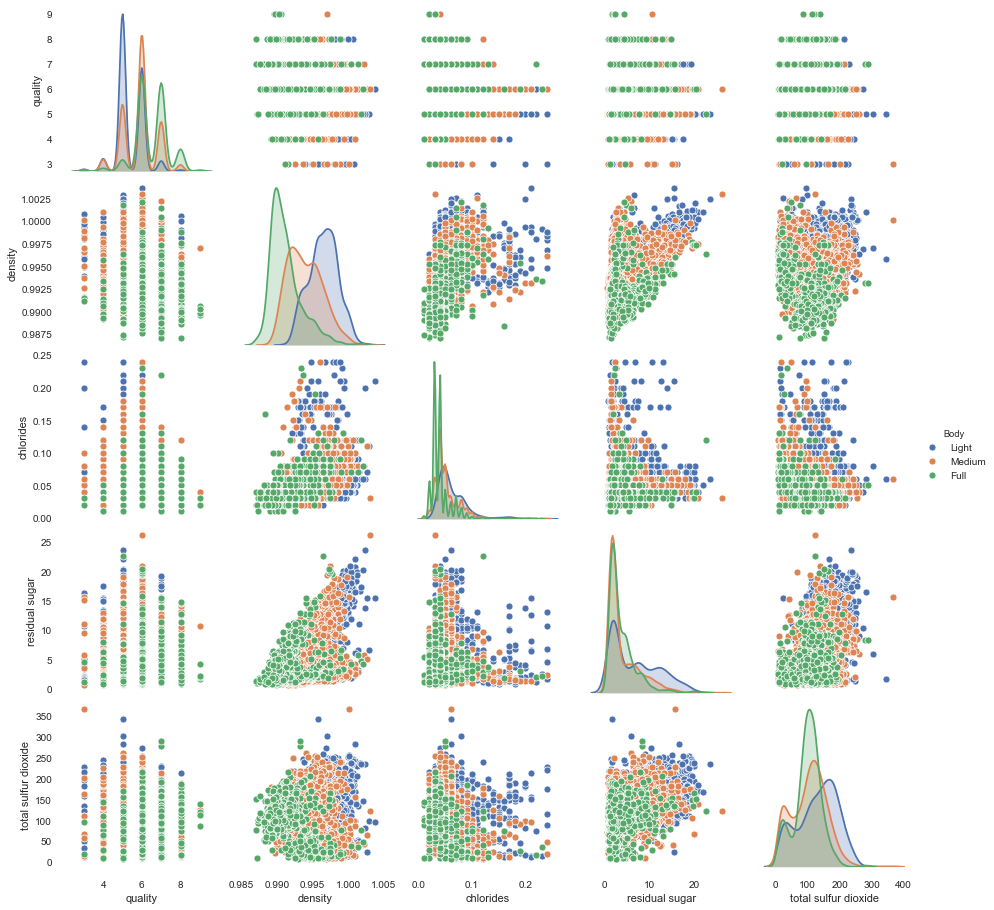

In [48]:
sns.pairplot(df_wineData, vars= ['quality','density','chlorides','residual sugar','total sulfur dioxide'], hue='Body', diag_kind='kde')

Text(0.5, 1.0, 'Number of Wines per Sweetness Type')

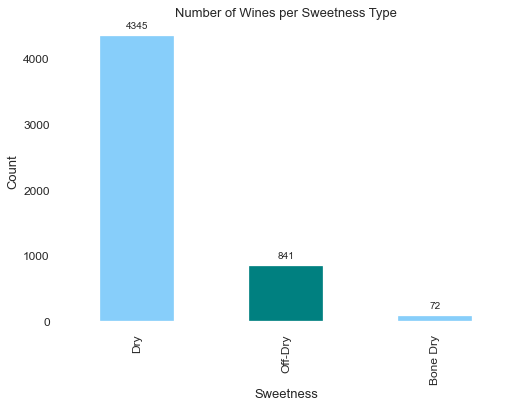

In [49]:
barGrp = df_wineData['Sweetness'].value_counts().plot(kind='bar',fontsize=12, color=['lightskyblue','teal'])
for p in barGrp.patches:
    barGrp.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.xlabel('Sweetness', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.title('Number of Wines per Sweetness Type', fontsize=13)

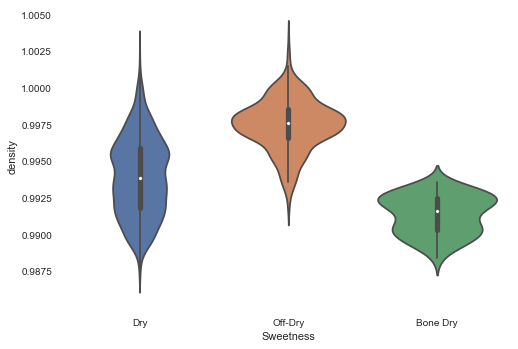

In [50]:
sns.violinplot(x='Sweetness', y='density', data=df_wineData)

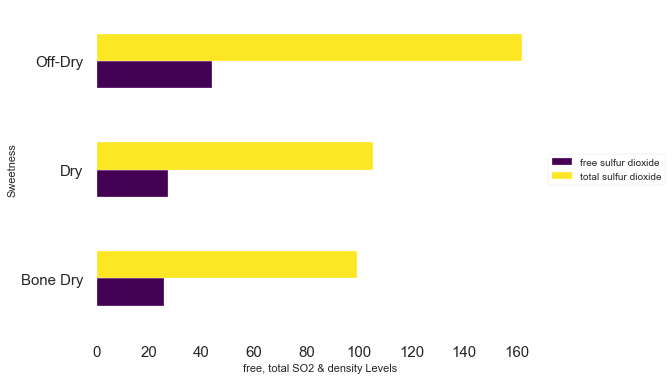

In [51]:
fontP.set_size('medium')
barhGraph = df_wineData.groupby('Sweetness')['free sulfur dioxide','total sulfur dioxide'].mean().plot(kind='barh', fontsize=15,
                                                            cmap='viridis', figsize=(8, 6))
plt.xlabel('free, total SO2 & density Levels')
barhGraph.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop=fontP)

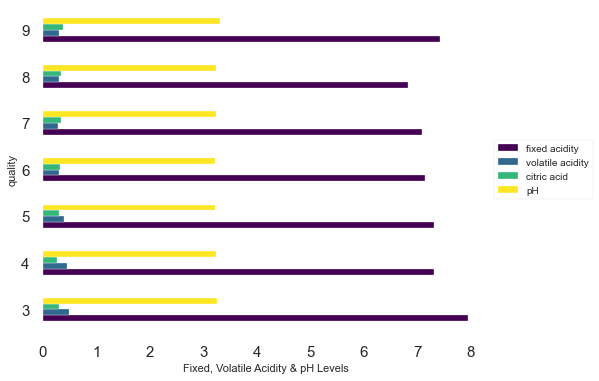

In [52]:
fontP.set_size('medium')
barhGraph = df_wineData.groupby('quality')['fixed acidity','volatile acidity','citric acid','pH'].mean().plot(kind='barh', fontsize=15,
                                                            cmap='viridis', figsize=(8, 6))
plt.xlabel('Fixed, Volatile Acidity & pH Levels')
barhGraph.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop=fontP)

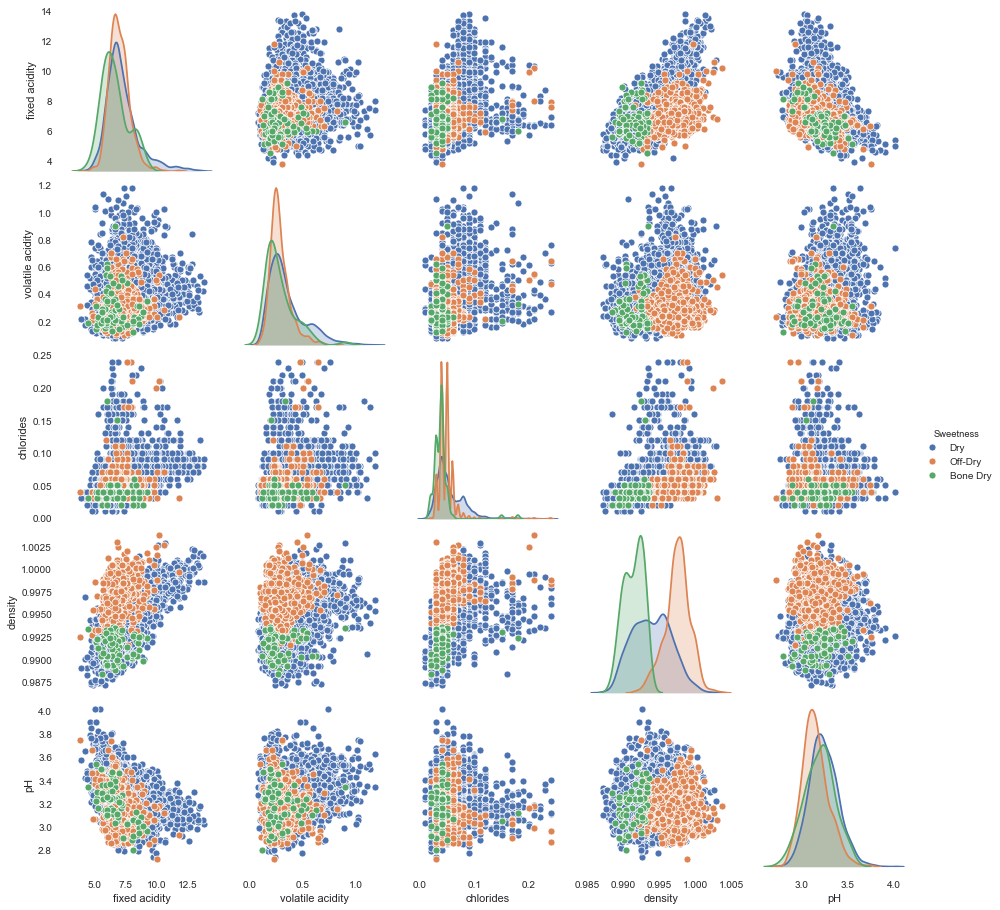

In [53]:
sns.pairplot(df_wineData, vars= ['fixed acidity','volatile acidity','chlorides','density','pH'], hue='Sweetness', diag_kind='kde' )

---------------------------------------------------------------------------------------

In [54]:
df_wineData['quality'].value_counts()

6    2305
5    1722
7     851
4     202
8     148
3      25
9       5
Name: quality, dtype: int64

Text(0.5, 1.0, 'Number of Wines per Quality')

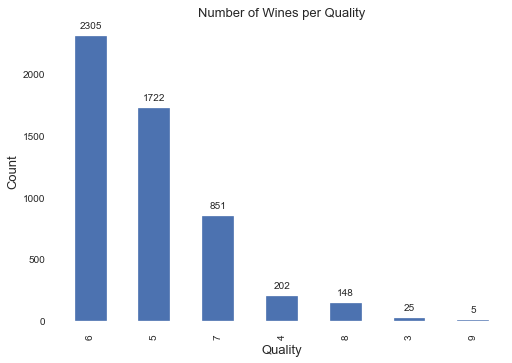

In [55]:
barGrp = df_wineData['quality'].value_counts().plot(kind='bar')
for p in barGrp.patches:
    barGrp.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.xlabel('Quality', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.title('Number of Wines per Quality', fontsize=13)

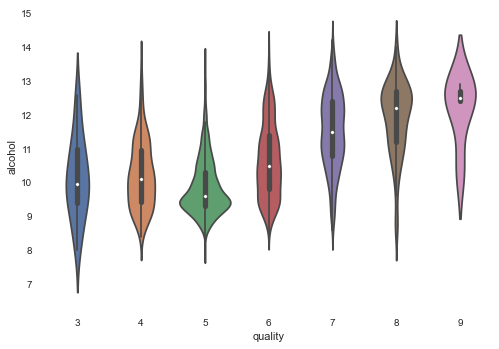

In [56]:
sns.violinplot(x='quality', y='alcohol', data=df_wineData)

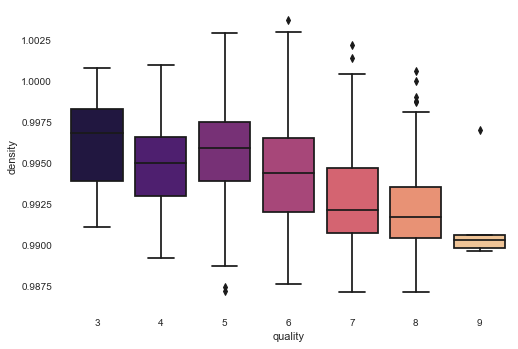

In [57]:
sns.boxplot(data=df_wineData, x='quality', y='density', palette='magma')

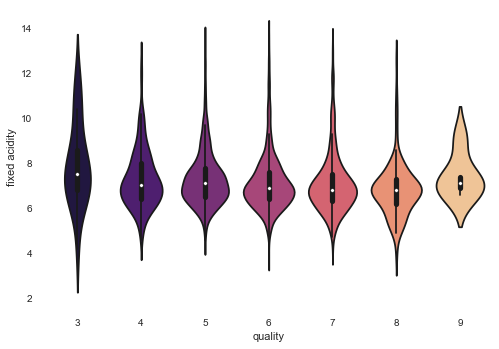

In [58]:
sns.violinplot(data=df_wineData, x='quality', y='fixed acidity', figsize=(12,8), palette='magma')

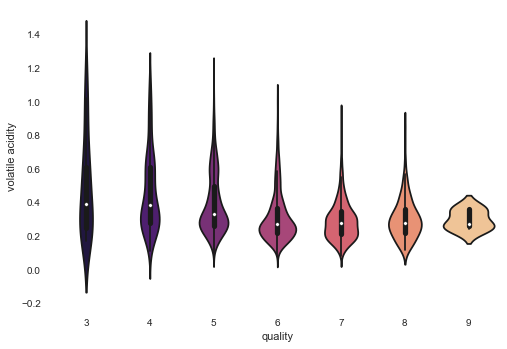

In [59]:
sns.violinplot(data=df_wineData, x='quality', y='volatile acidity', figsize=(12,8), palette='magma')

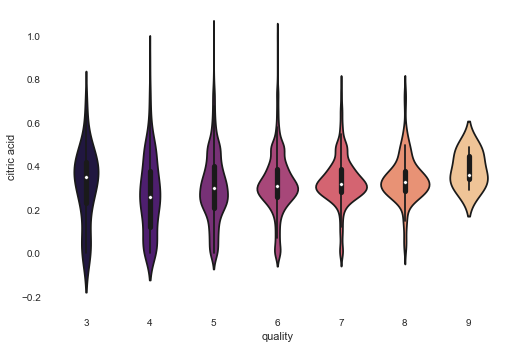

In [60]:
sns.violinplot(data=df_wineData, x='quality', y='citric acid', figsize=(12,8), palette='magma')

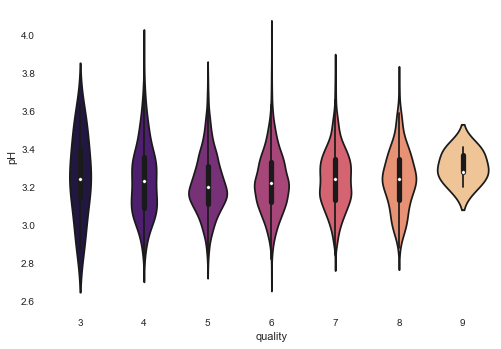

In [61]:
sns.violinplot(data=df_wineData, x='quality', y='pH', figsize=(12,8), palette='magma')

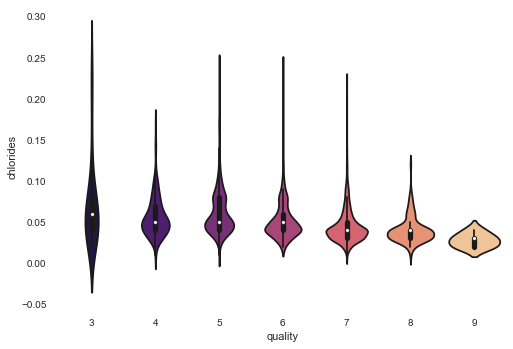

In [62]:
sns.violinplot(data=df_wineData, x='quality', y='chlorides', figsize=(12,8), palette='magma')

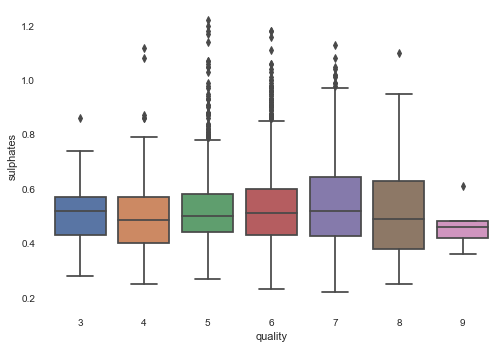

In [63]:
sns.boxplot(data=df_wineData, x='quality', y='sulphates')

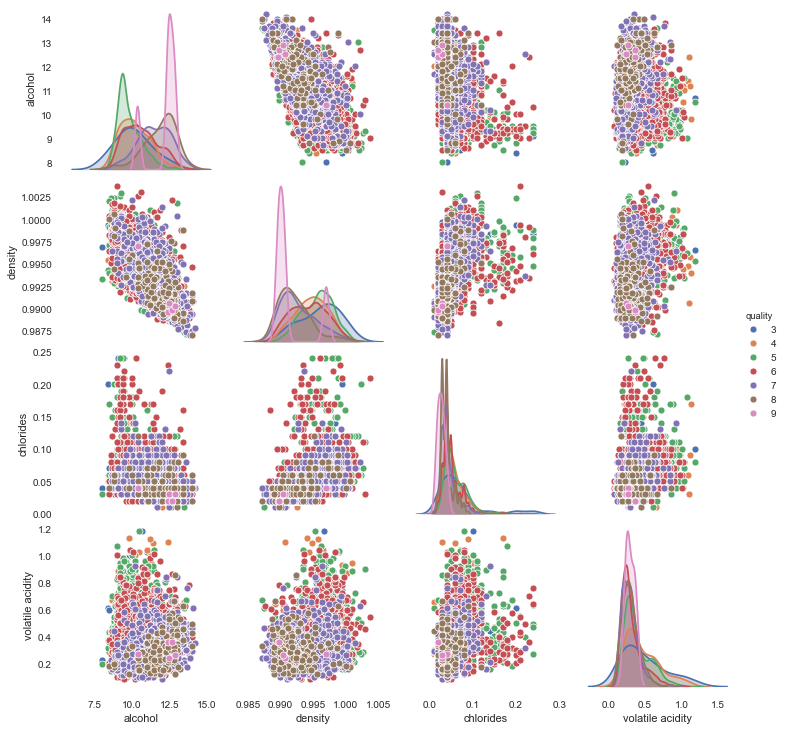

In [64]:
sns.pairplot(data=df_wineData, vars=['alcohol','density','chlorides', 'volatile acidity'], hue='quality', diag_kind='kde')